In [1]:
import sys
sys.path.append('../ptitprince/')
from collections import namedtuple
Circle = namedtuple("Circle", "x y r")
import pandas as pd
import numpy as np
import scipy as sp
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import os.path
import csv
import gc
import copy
import os

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
DATA_DIR="/home/somz/results_cc"
robots = [15,30,60]
seeds = [i for i in range(1,6)]

In [3]:
def get_name(n_robot,seed):
    fname = DATA_DIR +'/'+'perf_star_'+str(n_robot)+'_'+str(seed)+'.txt'
    print(fname)
    return fname

In [4]:
max_val_ = [0,0,0]
final_df = np.zeros(((3,6)),dtype=object)

exp_done = []
result = [[],[],[]]
max_df = [[],[],[]]

df2 = pd.DataFrame(columns=["time", "numones", "numtwoes", "lambda2_tree","lambda2_graph","tree_done","experiment_done","seed","number_of_robot"])

for n_i,n_robot in enumerate(robots):
    for seed_i,seed in enumerate(seeds):
        fname = get_name(n_robot,seed)
        data = pd.read_csv(fname, sep=",", header=None)
        data.columns = ["time", "numones", "numtwoes", "lambda2_tree","lambda2_graph","tree_done","experiment_done","seed","number_of_robot"]
        df = pd.DataFrame(data=data)
        df['time'] = df['time']/10
        x = df.loc[df['tree_done'] == 1].iloc[0]
        x['experiment_done'] = 0
        df2 = df2.append(x,ignore_index=True)
        df2['number_of_robot'] = df2['number_of_robot'].astype('int')
        
        if max_val_[n_i] < df.shape[0]: 
           max_df[n_i] = df  
           max_val_[n_i] = df.shape[0]
        final_df[n_i][seed] = df
        exp_done.append(df)




for n_i,n_robot in enumerate(robots):
    for seed_i,seed in enumerate(seeds):
        if (max_val_[n_i] - final_df[n_i][seed].shape[0]) > 0:
           length = max_val_[n_i] - final_df[n_i][seed].shape[0]
           #print("max_size: ",str(max[n_i]))
           #print("intiallength: ",str(df.shape[0]))
           #print("length: ",str(length))
           final_df[n_i][seed] = pd.concat([final_df[n_i][seed],pd.concat([final_df[n_i][seed][-1:]]*length)])
           final_df[n_i][seed]['time'] = max_df[n_i]['time'].values
           final_df[n_i][seed]  = final_df[n_i][seed].reset_index(drop=True)
           #print("finallength: ",str(df.shape[0]))

exp_done = pd.concat(exp_done)    
        

/home/somz/results_cc/perf_star_15_1.txt
/home/somz/results_cc/perf_star_15_2.txt
/home/somz/results_cc/perf_star_15_3.txt
/home/somz/results_cc/perf_star_15_4.txt
/home/somz/results_cc/perf_star_15_5.txt
/home/somz/results_cc/perf_star_30_1.txt
/home/somz/results_cc/perf_star_30_2.txt


/tmp/ipykernel_37406/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_37406/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_37406/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_37406/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_37406/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

/home/somz/results_cc/perf_star_30_3.txt
/home/somz/results_cc/perf_star_30_4.txt
/home/somz/results_cc/perf_star_30_5.txt
/home/somz/results_cc/perf_star_60_1.txt
/home/somz/results_cc/perf_star_60_2.txt
/home/somz/results_cc/perf_star_60_3.txt
/home/somz/results_cc/perf_star_60_4.txt
/home/somz/results_cc/perf_star_60_5.txt


/tmp/ipykernel_37406/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_37406/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)


In [8]:
pal=["darkblue","cyan","darkorange","red","green"]

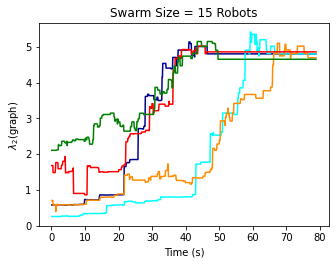

In [9]:

f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 15 Robots")

result[0] = pd.concat(final_df[0][1:6])
result[0] = result[0].reset_index(drop=True)

sns.lineplot(data=result[0],x='time',y='lambda2_graph',ci=None,hue='seed',legend=None,palette=pal)

# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:6],['initial condition-1','initial condition-2','initial condition-3','initial condition-4','initial condition-5'] ,loc="upper left",framealpha=0.4,fontsize=11)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("$\lambda_2$(graph) ",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/15_star_lambda2_graph.pdf", dpi=600, format="pdf", transparent=False)



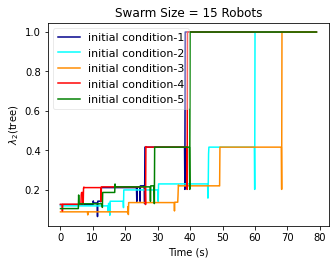

In [10]:

f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 15 Robots")

# for i in range(5):
#     final_df[0][i].drop(final_df[0][i][(final_df[0][i]['lambda2_tree'] <= 0) | (final_df[0][i]['time'] >= 100)].index,inplace=True)
    # legend = str(i) + "-" + "seed"

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("$\lambda_2$(tree)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)



result[0] = pd.concat(final_df[0][1:6])
result[0] = result[0].reset_index(drop=True)
sns.lineplot(data=result[0],x='time',y='lambda2_tree',ci=None,hue='seed',palette=pal,ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6],['initial condition-1','initial condition-2','initial condition-3','initial condition-4','initial condition-5'] ,loc="upper left",framealpha=0.4,fontsize=11)


plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/15_star_lambda2_tree.pdf", dpi=600, format="pdf", transparent=False)
    


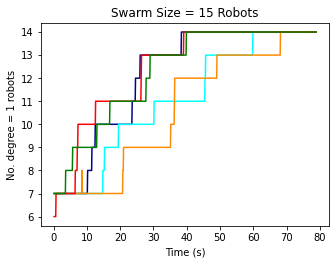

In [11]:

f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 15 Robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree = 1 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[0],x='time',y='numones',ci=None,hue='seed',palette=pal,legend=None)
# ax.set(xlabel=None)
# sns.lineplot(data=result[0],x='time',y='numtwoes',ci=None,hue='seed',palette=pal,legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/15_star_numones.pdf", dpi=600, format="pdf", transparent=False)



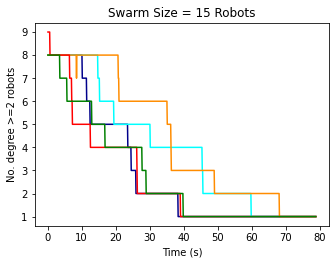

In [12]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 15 Robots")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree >=2 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[0],x='time',y='numtwoes',ci=None,hue='seed',palette=pal,legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/15_star_numtwoes.pdf", dpi=600, format="pdf", transparent=False)



In [13]:
def get_names_f(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('x_'+str(k))
        n.append('y_'+str(k))
    return n

In [14]:
coverage_result_final = np.zeros(6,dtype=object)
max_val = 0
for o in range(1,6):
    coverage_result = pd.DataFrame()
    fname = "/home/somz/results_cc/pos_star_15_" +str(o)+".txt"
    print(fname)
    data = pd.read_csv(fname, sep=",", header=None)
    range_rab = 2.5
    circles = []

    name = get_names_f(15)
    data = pd.read_csv(fname, names=name,sep=",", header=None)
    df = pd.DataFrame(data=data)
    df2 = pd.DataFrame(data=data)
    print(df2.shape[0])
    print(df)
    df.drop('time', axis=1, inplace=True)
    df.drop('seed', axis=1, inplace=True)
    df.drop('no_of_robots', axis=1, inplace=True)
    df.drop(df.filter(regex='id').columns, axis=1, inplace=True)


    positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([tuple(i) for i in x.values]))
    shape = positionalDf.shape

    for l in range(0,int(df2.shape[0])+1,10):
        circles = []
        for j in range(15):
            
            circles.append(Circle(positionalDf[j][l][0],positionalDf[j][l][1],range_rab))
        x_min_r = [c.x - c.r for c in circles]
        x_max_r = [c.x + c.r for c in circles]
        y_min_r = [c.y - c.r for c in circles]
        y_max_r = [c.y + c.r for c in circles]

        x_min = min(x_min_r)
        x_max = max(x_max_r)
        y_min = min(y_min_r)
        y_max = max(y_max_r)
 
        box_side = 100
 
        dx = (x_max - x_min) / box_side
        dy = (y_max - y_min) / box_side
 
        count = 0
 
        for r in range(box_side):
            y = y_min + r * dy
            for c in range(box_side):
                x = x_min + c * dx
                if any((x-circle.x)**2 + (y-circle.y)**2 <= (circle.r ** 2)
                    for circle in circles):
                    count += 1
        
        coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
    if (max_val < coverage_result.shape[0]):
        max_val = coverage_result.shape[0]
        max_df = coverage_result
    coverage_result_final[o] = coverage_result

for o in range(1,6):
    if (max_val - coverage_result_final[o].shape[0]) > 0:
        length = max_val - coverage_result_final[o].shape[0]
        coverage_result_final[o] = pd.concat([coverage_result_final[o],pd.concat([coverage_result_final[o][-1:]]*length)])
        # print(max_df["Time"])
        coverage_result_final[o]["Time"] = max_df["Time"].values
        coverage_result_final[o]  = coverage_result_final[o].reset_index(drop=True)

/home/somz/results_cc/pos_star_15_1.txt
479
     time  seed  no_of_robots  id:0      x_0       y_0  id:1       x_1  \
0       1     1            15     0  0.00000  0.000000     1 -0.971781   
1       2     1            15     0  0.00000  0.000000     1 -0.971781   
2       3     1            15     0  0.00000  0.000000     1 -0.971781   
3       4     1            15     0  0.00000  0.000000     1 -0.971781   
4       5     1            15     0  0.00000  0.000000     1 -0.971781   
..    ...   ...           ...   ...      ...       ...   ...       ...   
474   475     1            15     0  1.21499 -0.090171     1 -0.144646   
475   476     1            15     0  1.21499 -0.090171     1 -0.144646   
476   477     1            15     0  1.21499 -0.090171     1 -0.144646   
477   478     1            15     0  1.21499 -0.090171     1 -0.144646   
478   479     1            15     0  1.21499 -0.090171     1 -0.144646   

          y_1  id:2  ...     y_11  id:12     x_12      y_12  id:13 

/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is depr

/home/somz/results_cc/pos_star_15_2.txt
721
     time  seed  no_of_robots  id:0       x_0       y_0  id:1       x_1  \
0       1     2            15     0  0.000000  0.000000     1 -1.015200   
1       2     2            15     0  0.000000  0.000000     1 -1.015200   
2       3     2            15     0  0.005398 -0.006073     1 -1.015200   
3       4     2            15     0  0.012578 -0.013029     1 -1.015200   
4       5     2            15     0  0.020456 -0.019179     1 -1.015200   
..    ...   ...           ...   ...       ...       ...   ...       ...   
716   717     2            15     0  0.685103  0.257284     1 -0.623134   
717   718     2            15     0  0.685103  0.257284     1 -0.623134   
718   719     2            15     0  0.685103  0.257284     1 -0.623134   
719   720     2            15     0  0.685103  0.257284     1 -0.620149   
720   721     2            15     0  0.685103  0.257284     1 -0.616476   

         y_1  id:2  ...      y_11  id:12     x_12      

/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is depr

/home/somz/results_cc/pos_star_15_3.txt
789
     time  seed  no_of_robots  id:0       x_0      y_0  id:1       x_1  \
0       1     3            15     0  0.000000  0.00000     1  0.516251   
1       2     3            15     0  0.000000  0.00000     1  0.516251   
2       3     3            15     0  0.000000  0.00000     1  0.524363   
3       4     3            15     0  0.000000  0.00000     1  0.534284   
4       5     3            15     0  0.000000  0.00000     1  0.544082   
..    ...   ...           ...   ...       ...      ...   ...       ...   
784   785     3            15     0  0.251853  1.22372     1  0.574180   
785   786     3            15     0  0.251853  1.22372     1  0.574180   
786   787     3            15     0  0.251853  1.22372     1  0.574180   
787   788     3            15     0  0.251853  1.22372     1  0.574180   
788   789     3            15     0  0.251853  1.22372     1  0.574180   

         y_1  id:2  ...      y_11  id:12     x_12     y_12  id:13  

/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is depr

/home/somz/results_cc/pos_star_15_4.txt
485
     time  seed  no_of_robots  id:0       x_0       y_0  id:1      x_1  \
0       1     4            15     0  0.000000  0.000000     1  1.18355   
1       2     4            15     0  0.000000  0.000000     1  1.18355   
2       3     4            15     0  0.007984 -0.001505     1  1.18355   
3       4     4            15     0  0.017811 -0.003357     1  1.18355   
4       5     4            15     0  0.027434 -0.006062     1  1.18355   
..    ...   ...           ...   ...       ...       ...   ...      ...   
480   481     4            15     0 -0.247015 -0.066420     1  1.18236   
481   482     4            15     0 -0.247015 -0.066420     1  1.18236   
482   483     4            15     0 -0.247015 -0.066420     1  1.18236   
483   484     4            15     0 -0.247015 -0.066420     1  1.18236   
484   485     4            15     0 -0.247015 -0.066420     1  1.18236   

          y_1  id:2  ...     y_11  id:12     x_12      y_12  id:13 

/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is depr

/home/somz/results_cc/pos_star_15_5.txt
521
     time  seed  no_of_robots  id:0       x_0       y_0  id:1       x_1  \
0       1     5            15     0  0.000000  0.000000     1  1.043080   
1       2     5            15     0  0.000000  0.000000     1  1.043080   
2       3     5            15     0 -0.005110  0.006317     1  1.049060   
3       4     5            15     0 -0.006289  0.007775     1  1.056180   
4       5     5            15     0 -0.006289  0.007775     1  1.063030   
..    ...   ...           ...   ...       ...       ...   ...       ...   
516   517     5            15     0  0.292306  0.736682     1  0.916971   
517   518     5            15     0  0.292306  0.736682     1  0.918779   
518   519     5            15     0  0.292306  0.736682     1  0.918779   
519   520     5            15     0  0.292306  0.736682     1  0.918779   
520   521     5            15     0  0.292306  0.736682     1  0.918779   

         y_1  id:2  ...      y_11  id:12      x_12     

/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2096742483.py:56: FutureWarning: The frame.append method is depr

In [26]:
coverage_result_final = np.zeros(6,dtype=object)
max_val = 0
for o in range(1,6):
    coverage_result = pd.DataFrame()
    fname = "/home/somz/results_cc/pos_star_60_" +str(o)+".txt"
    # print(fname)
    data = pd.read_csv(fname, sep=",", header=None)
    range_rab = 10
    circles = []

    name = get_names_f(60)
    data = pd.read_csv(fname, names=name,sep=",", header=None)
    df = pd.DataFrame(data=data)
    df2 = pd.DataFrame(data=data)
    # print(df2.shape[0])
    # print(df)
    df.drop('time', axis=1, inplace=True)
    df.drop('seed', axis=1, inplace=True)
    df.drop('no_of_robots', axis=1, inplace=True)
    df.drop(df.filter(regex='id').columns, axis=1, inplace=True)


    positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([tuple(i) for i in x.values]))
    shape = positionalDf.shape

    for l in range(0,int(df2.shape[0]),50):
        
        circles = []
        for j in range(60):
            circles.append(Circle(positionalDf[j][l][0],positionalDf[j][l][1],range_rab))
        x_min_r = [c.x - c.r for c in circles]
        x_max_r = [c.x + c.r for c in circles]
        y_min_r = [c.y - c.r for c in circles]
        y_max_r = [c.y + c.r for c in circles]

        x_min = min(x_min_r)
        # print(x_max_r)
        x_max = max(x_max_r)
        y_min = min(y_min_r)
        y_max = max(y_max_r)
 
        box_side = 100
 
        dx = (x_max - x_min) / box_side
        dy = (y_max - y_min) / box_side
 
        count = 0
 
        for r in range(box_side):
            y = y_min + r * dy
            for c in range(box_side):
                x = x_min + c * dx
                if any((x-circle.x)**2 + (y-circle.y)**2 <= (circle.r ** 2)
                    for circle in circles):
                    count += 1
        
        coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":60,"seed":o,"area":count * dx * dy}, ignore_index = True)
    if (max_val < coverage_result.shape[0]):
        max_val = coverage_result.shape[0]
        max_df = coverage_result
    coverage_result_final[o] = coverage_result

for o in range(1,6):
    if (max_val - coverage_result_final[o].shape[0]) > 0:
        length = max_val - coverage_result_final[o].shape[0]
        coverage_result_final[o] = pd.concat([coverage_result_final[o],pd.concat([coverage_result_final[o][-1:]]*length)])
        # print(max_df["Time"])
        coverage_result_final[o]["Time"] = max_df["Time"].values
        coverage_result_final[o]  = coverage_result_final[o].reset_index(drop=True)

# coverage_result_final = pd.concat(coverage_result_final[1:6])
    

/tmp/ipykernel_37406/2799909269.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":60,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2799909269.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":60,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2799909269.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":60,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/2799909269.py:57: FutureWarning: The frame.append method is depr

In [20]:
coverage_result_final = np.zeros(6,dtype=object)
max_val = 0
for o in range(1,6):
    coverage_result = pd.DataFrame()
    fname = "/home/somz/results_cc/pos_star_30_" +str(o)+".txt"
    print(fname)
    data = pd.read_csv(fname, sep=",", header=None)
    range_rab = 5
    circles = []

    name = get_names_f(30)
    data = pd.read_csv(fname, names=name,sep=",", header=None)
    df = pd.DataFrame(data=data)
    df2 = pd.DataFrame(data=data)
    print(df2.shape[0])
    print(df)
    df.drop('time', axis=1, inplace=True)
    df.drop('seed', axis=1, inplace=True)
    df.drop('no_of_robots', axis=1, inplace=True)
    df.drop(df.filter(regex='id').columns, axis=1, inplace=True)


    positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([tuple(i) for i in x.values]))
    shape = positionalDf.shape

    for l in range(0,int(df2.shape[0])+1,10):
        circles = []
        for j in range(30):
            
            circles.append(Circle(positionalDf[j][l][0],positionalDf[j][l][1],range_rab))
        x_min_r = [c.x - c.r for c in circles]
        x_max_r = [c.x + c.r for c in circles]
        y_min_r = [c.y - c.r for c in circles]
        y_max_r = [c.y + c.r for c in circles]

        x_min = min(x_min_r)
        x_max = max(x_max_r)
        y_min = min(y_min_r)
        y_max = max(y_max_r)
 
        box_side = 100
 
        dx = (x_max - x_min) / box_side
        dy = (y_max - y_min) / box_side
 
        count = 0
 
        for r in range(box_side):
            y = y_min + r * dy
            for c in range(box_side):
                x = x_min + c * dx
                if any((x-circle.x)**2 + (y-circle.y)**2 <= (circle.r ** 2)
                    for circle in circles):
                    count += 1
        
        coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
    if (max_val < coverage_result.shape[0]):
        max_val = coverage_result.shape[0]
        max_df = coverage_result
    coverage_result_final[o] = coverage_result

for o in range(1,6):
    if (max_val - coverage_result_final[o].shape[0]) > 0:
        length = max_val - coverage_result_final[o].shape[0]
        coverage_result_final[o] = pd.concat([coverage_result_final[o],pd.concat([coverage_result_final[o][-1:]]*length)])
        # print(max_df["Time"])
        coverage_result_final[o]["Time"] = max_df["Time"].values
        coverage_result_final[o]  = coverage_result_final[o].reset_index(drop=True)

/home/somz/results_cc/pos_star_30_1.txt
2036
      time  seed  no_of_robots  id:0      x_0      y_0  id:1      x_1  \
0        1     1            30     0  0.00000  0.00000     1 -1.94356   
1        2     1            30     0  0.00000  0.00000     1 -1.94356   
2        3     1            30     0  0.00000  0.00000     1 -1.94356   
3        4     1            30     0  0.00000  0.00000     1 -1.94356   
4        5     1            30     0  0.00000  0.00000     1 -1.94356   
...    ...   ...           ...   ...      ...      ...   ...      ...   
2031  2032     1            30     0  4.40309 -1.45523     1  1.55609   
2032  2033     1            30     0  4.40812 -1.44885     1  1.55609   
2033  2034     1            30     0  4.40928 -1.44738     1  1.55609   
2034  2035     1            30     0  4.40928 -1.44738     1  1.55609   
2035  2036     1            30     0  4.40928 -1.44738     1  1.55609   

           y_1  id:2  ...     y_26  id:27     x_27     y_27  id:28     x_28  \

/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecat

/home/somz/results_cc/pos_star_30_2.txt
1556
      time  seed  no_of_robots  id:0       x_0       y_0  id:1       x_1  \
0        1     2            30     0  0.000000  0.000000     1 -2.030410   
1        2     2            30     0  0.000000  0.000000     1 -2.030410   
2        3     2            30     0  0.005398 -0.006073     1 -2.022290   
3        4     2            30     0  0.011368 -0.014090     1 -2.012350   
4        5     2            30     0  0.016212 -0.022829     1 -2.002720   
...    ...   ...           ...   ...       ...       ...   ...       ...   
1551  1552     2            30     0  1.925040  0.129963     1 -0.506539   
1552  1553     2            30     0  1.925040  0.129963     1 -0.506539   
1553  1554     2            30     0  1.925040  0.129963     1 -0.506539   
1554  1555     2            30     0  1.925040  0.129963     1 -0.506539   
1555  1556     2            30     0  1.925040  0.129963     1 -0.506539   

          y_1  id:2  ...      y_26  id:27 

/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecat

/home/somz/results_cc/pos_star_30_3.txt
2582
      time  seed  no_of_robots  id:0      x_0      y_0  id:1      x_1  \
0        1     3            30     0  0.00000  0.00000     1  1.03250   
1        2     3            30     0  0.00000  0.00000     1  1.03250   
2        3     3            30     0  0.00000  0.00000     1  1.04061   
3        4     3            30     0  0.00000  0.00000     1  1.05050   
4        5     3            30     0  0.00000  0.00000     1  1.06017   
...    ...   ...           ...   ...      ...      ...   ...      ...   
2577  2578     3            30     0  2.51067  3.41318     1  4.19260   
2578  2579     3            30     0  2.51067  3.41318     1  4.19260   
2579  2580     3            30     0  2.51067  3.41318     1  4.19260   
2580  2581     3            30     0  2.51067  3.41318     1  4.19260   
2581  2582     3            30     0  2.51067  3.41318     1  4.19260   

          y_1  id:2  ...      y_26  id:27     x_27      y_27  id:28      x_28 

/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecat

/home/somz/results_cc/pos_star_30_4.txt
1892
      time  seed  no_of_robots  id:0      x_0      y_0  id:1      x_1  \
0        1     4            30     0  0.00000  0.00000     1  2.36710   
1        2     4            30     0  0.00000  0.00000     1  2.36710   
2        3     4            30     0  0.00000  0.00000     1  2.36710   
3        4     4            30     0  0.00000  0.00000     1  2.36710   
4        5     4            30     0  0.00000  0.00000     1  2.36710   
...    ...   ...           ...   ...      ...      ...   ...      ...   
1887  1888     4            30     0  1.92296  1.53744     1  1.67984   
1888  1889     4            30     0  1.92296  1.53744     1  1.67984   
1889  1890     4            30     0  1.92296  1.53744     1  1.67984   
1890  1891     4            30     0  1.92296  1.53744     1  1.67984   
1891  1892     4            30     0  1.92296  1.53744     1  1.67984   

          y_1  id:2  ...      y_26  id:27      x_27     y_27  id:28      x_28 

/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecat

/home/somz/results_cc/pos_star_30_5.txt
2382
      time  seed  no_of_robots  id:0       x_0       y_0  id:1      x_1  \
0        1     5            30     0  0.000000  0.000000     1  2.08617   
1        2     5            30     0  0.000000  0.000000     1  2.08617   
2        3     5            30     0 -0.005110  0.006317     1  2.08617   
3        4     5            30     0 -0.006289  0.007775     1  2.08617   
4        5     5            30     0 -0.006289  0.007775     1  2.08617   
...    ...   ...           ...   ...       ...       ...   ...      ...   
2377  2378     5            30     0 -1.357120  2.525010     1  1.80467   
2378  2379     5            30     0 -1.357120  2.525010     1  1.80467   
2379  2380     5            30     0 -1.357120  2.525010     1  1.80467   
2380  2381     5            30     0 -1.357120  2.525010     1  1.80467   
2381  2382     5            30     0 -1.357120  2.525010     1  1.80467   

          y_1  id:2  ...      y_26  id:27     x_27    

/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_37406/771723946.py:56: FutureWarning: The frame.append method is deprecat

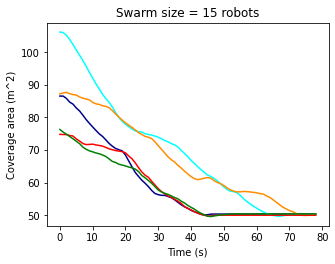

In [15]:
# pal=["pink","cyan","orange","red","green"]
pal=["darkblue","cyan","darkorange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm size = 15 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("Coverage area (m^2)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=coverage_result_final[1],x='Time',y='area',ci=None,color=pal[0],legend=None)
sns.lineplot(data=coverage_result_final[2],x='Time',y='area',ci=None,color=pal[1],legend=None)
sns.lineplot(data=coverage_result_final[3],x='Time',y='area',ci=None,color=pal[2],legend=None)
sns.lineplot(data=coverage_result_final[4],x='Time',y='area',ci=None,color=pal[3],legend=None)
sns.lineplot(data=coverage_result_final[5],x='Time',y='area',ci=None,color=pal[4],legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/15_star_coverage_area.pdf", dpi=600, format="pdf", transparent=False)

In [56]:
pal=["darkblue","cyan","darkorange","red","green"]

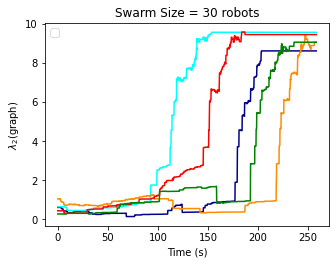

In [16]:

f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 30 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("$\lambda_2$(graph) ",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)



result[1] = pd.concat(final_df[1][1:6])
result[1] = result[1].reset_index(drop=True)
sns.lineplot(data=result[1],x='time',y='lambda2_graph',ci=None,hue='seed',palette=pal,legend=None)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6], ['initial condition-1','initial condition-2','initial condition-3','initial condition-4','initial condition-5'],loc="upper left",framealpha=0.7,fontsize=11)

plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/30_star_lambda2_graph.pdf", dpi=600, format="pdf", transparent=False)



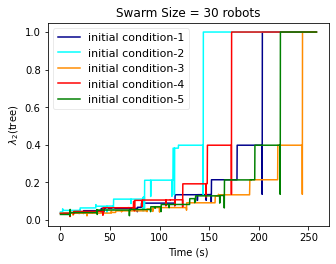

In [17]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 30 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("$\lambda_2$(tree)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


for i in range(1,6):
     final_df[1][i].drop(final_df[1][i][(final_df[1][i]['lambda2_tree'] <= 0) ].index,inplace=True)
     legend = str(i) + "-" + "seed"

result[1] = pd.concat(final_df[1][1:6])
result[1] = result[1].reset_index(drop=True)
sns.lineplot(data=result[1],x='time',y='lambda2_tree',ci=None,hue='seed',palette=pal,ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6],['initial condition-1','initial condition-2','initial condition-3','initial condition-4','initial condition-5'] ,loc="upper left",framealpha=0.4,fontsize=11)

plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/30_star_lambda2_tree.pdf", dpi=600, format="pdf", transparent=False)



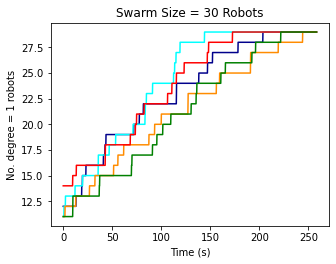

In [18]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 30 Robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree = 1 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[1],x='time',y='numones',ci=None,hue='seed',palette=pal,legend=None)
# ax.set(xlabel=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/30_star_numones.pdf", dpi=600, format="pdf", transparent=False)



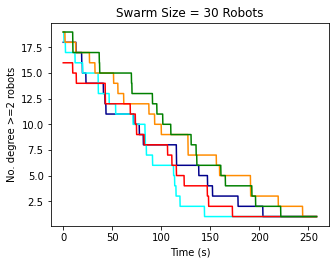

In [19]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 30 Robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree >=2 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[1],x='time',y='numtwoes',ci=None,hue='seed',palette=pal,legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/30_star_numtwoes.pdf", dpi=600, format="pdf", transparent=False)



In [25]:
pal=["darkblue","cyan","darkorange","red","green"]

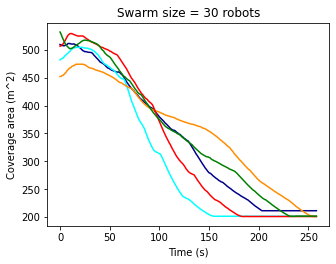

In [21]:
# pal=["pink","cyan","orange","red","green"]

f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm size = 30 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("Coverage area (m^2)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=coverage_result_final[1],x='Time',y='area',ci=None,color=pal[0],legend=None)
sns.lineplot(data=coverage_result_final[2],x='Time',y='area',ci=None,color=pal[1],legend=None)
sns.lineplot(data=coverage_result_final[3],x='Time',y='area',ci=None,color=pal[2],legend=None)
sns.lineplot(data=coverage_result_final[4],x='Time',y='area',ci=None,color=pal[3],legend=None)
sns.lineplot(data=coverage_result_final[5],x='Time',y='area',ci=None,color=pal[4],legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/30_star_coverage_area.pdf", dpi=600, format="pdf", transparent=False)

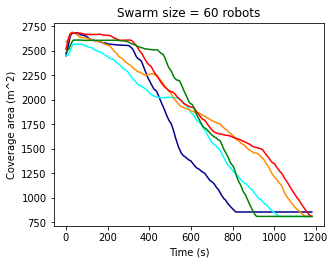

In [27]:
# pal=["pink","cyan","orange","red","green"]
pal=["darkblue","cyan","darkorange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm size = 60 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("Coverage area (m^2)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=coverage_result_final[1],x='Time',y='area',ci=None,color=pal[0],legend=None)
sns.lineplot(data=coverage_result_final[2],x='Time',y='area',ci=None,color=pal[1],legend=None)
sns.lineplot(data=coverage_result_final[3],x='Time',y='area',ci=None,color=pal[2],legend=None)
sns.lineplot(data=coverage_result_final[4],x='Time',y='area',ci=None,color=pal[3],legend=None)
sns.lineplot(data=coverage_result_final[5],x='Time',y='area',ci=None,color=pal[4],legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/60_star_coverage_area.pdf", dpi=600, format="pdf", transparent=False)

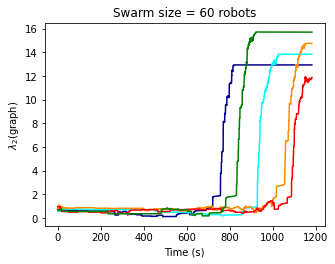

In [22]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm size = 60 robots")

result[2] = pd.concat(final_df[2][1:6])
result[2] = result[2].reset_index(drop=True)

sns.lineplot(data=result[2],x='time',y='lambda2_graph',ci=None,hue='seed',palette=pal,ax=ax,legend=None)

# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:5], ['run-0','run-1','run-2','run-3','run-4'],loc="upper left",framealpha=0.7,fontsize=11)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("$\lambda_2$(graph) ",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)

plt.tight_layout(pad=0.1)

plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/60_star_lambda2_graph.pdf", dpi=600, format="pdf", transparent=False)



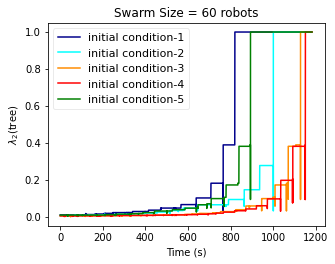

In [23]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 60 robots")
ax.set_ylabel("$\lambda_2$(tree)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)

for i in range(1,6):
     final_df[2][i].drop(final_df[2][i][(final_df[2][i]['lambda2_tree'] <= 0) | (final_df[2][i]['time'] >= 1500) ].index,inplace=True)
     # legend = str(i) + "-" + "seed"


result[2] = pd.concat(final_df[2][1:6])
result[2] = result[2].reset_index(drop=True)
sns.lineplot(data=result[2],x='time',y='lambda2_tree',ci=None,hue='seed',palette=pal,ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6],['initial condition-1','initial condition-2','initial condition-3','initial condition-4','initial condition-5'] ,loc="upper left",framealpha=0.4,fontsize=11)


plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 



plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/60_star_lambda2_tree.pdf", dpi=600, format="pdf", transparent=False)
    


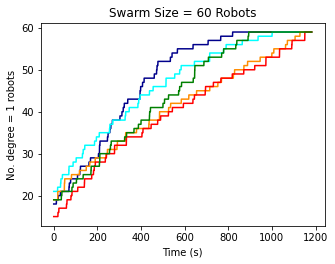

In [24]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 60 Robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree = 1 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[2],x='time',y='numones',ci=None,hue='seed',palette=pal,legend=None)
# ax.set(xlabel=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/60_star_numones.pdf", dpi=600, format="pdf", transparent=False)



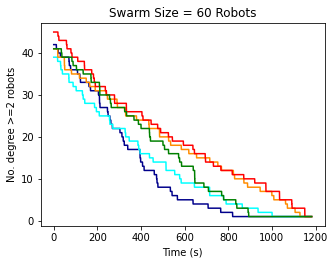

In [25]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 60 Robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree >=2 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[2],x='time',y='numtwoes',ci=None,hue='seed',palette=pal,legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/60_star_numtwoes.pdf", dpi=600, format="pdf", transparent=False)



In [5]:
fgraph_time_df = exp_done[exp_done['experiment_done'] == 1]
fgraph_time_df = fgraph_time_df.reset_index(drop=True)

final = pd.concat([df2,fgraph_time_df])
final = final.reset_index(drop=True)

In [28]:
df2.groupby(by=["number_of_robot"]).mean()

,time,numones,numtwoes,lambda2_tree,lambda2_graph,tree_done,experiment_done,seed
number_of_robot,,,,,,,,
15,49.10,14.0,1.0,0.200686,4.932396,1.0,0.0,3.0
30,197.14,29.0,1.0,0.136346,8.794910,1.0,0.0,3.0
60,998.60,59.0,1.0,0.263118,13.364780,1.0,0.2,3.0


In [29]:
fgraph_time_df.groupby(by=["number_of_robot"]).mean()

,time,numones,numtwoes,lambda2_tree,lambda2_graph,tree_done,experiment_done,seed
number_of_robot,,,,,,,,
15,59.90,14.0,1.0,1.0,4.760514,1.0,1.0,3.0
30,208.96,29.0,1.0,1.0,9.149066,1.0,1.0,3.0
60,1021.04,59.0,1.0,1.0,13.836160,1.0,1.0,3.0


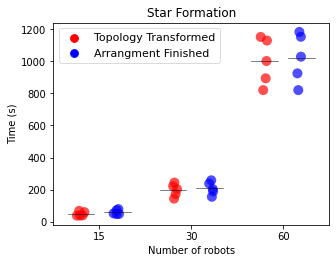

In [7]:
dx="number_of_robot"
dy="time"
dhue="experiment_done"
pal=["red","blue"]
data = final

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Star Formation")


sns.stripplot(x=dx, 
              y=dy, 
              hue=dhue, 
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ['Topology Transformed','Arrangment Finished'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)

plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_star.pdf", dpi=600, format="pdf", transparent=False)


plt.show()